# **PRIMING**

In [51]:
#fonte do dataset usado: https://github.com/daniel7an/Startup-Success-Analysis/tree/main

!pip install plotly

!pip install tabulate

!pip install xgboost==1.5.2


In [52]:
import pandas as pd

# URL do arquivo CSV (raw do GitHub)
url = 'https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv'

# Carregar o CSV diretamente do link com codificação especificada
df = pd.read_csv(url, encoding='ISO-8859-1')

# Exibir os nomes das colunas
from IPython.display import display

# Exibir os nomes das colunas
display(df.columns)




Index(['Company_Name', 'Dependent-Company Status', 'year of founding',
       'Age of company in years', 'Internet Activity Score',
       'Short Description of company profile', 'Industry of company',
       'Focus functions of company', 'Investors', 'Employee Count',
       ...
       'Percent_skill_Data Science', 'Percent_skill_Business Strategy',
       'Percent_skill_Product Management', 'Percent_skill_Sales',
       'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
       'Percent_skill_Finance', 'Percent_skill_Investment', 'Renown score'],
      dtype='object', length=116)

In [53]:

# Exibir as primeiras linhas do CSV para ver os dados
head = df.head()
display(head)

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6


# **MID**

In [54]:
import pandas as pd

# Carregar o dataset
url = 'https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

# Converter a coluna 'Renown score' para numérica, substituindo erros por NaN
df['Renown score'] = pd.to_numeric(df['Renown score'], errors='coerce')

# Remover linhas onde 'Renown score' é NaN
df = df.dropna(subset=['Renown score'])

# Filtrar empresas com menos de 3 funcionários
df_small_teams = df[df['Employee Count'] < 3]

# Calcular a média do Renown Score por setor
sector_success = df_small_teams.groupby('Industry of company')['Renown score'].mean().sort_values(ascending=False)

# Exibir os 10 setores com maior sucesso para startups pequenas
print("Top 10 Setores com maior sucesso para empresas pequenas:")
print(sector_success.head(10))


import pandas as pd

# Carregar o dataset
url = 'https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

# Converter a coluna 'Renown score' para numérica, substituindo erros por NaN
df['Renown score'] = pd.to_numeric(df['Renown score'], errors='coerce')

# Filtrar empresas com menos de 3 funcionários
df_small_teams = df[df['Employee Count'] < 3]

# Calcular a média do Renown Score por setor
sector_success = df_small_teams.groupby('Industry of company')['Renown score'].mean().sort_values(ascending=False)

# Definir sucesso como empresas com Renown score acima de 5.0 (pode ajustar conforme necessário)
success_threshold = 5.0

# Calcular o sucesso de cada setor: número de empresas que tentaram e quantas conseguiram
sector_success_count = df_small_teams.groupby('Industry of company').agg(
    total_companies=('Company_Name', 'count'),
    successful_companies=('Renown score', lambda x: (x > success_threshold).sum())
)

# Calcular a taxa de sucesso de cada setor
sector_success_count['success_rate'] = sector_success_count['successful_companies'] / sector_success_count['total_companies']

# Exibir os 10 setores com maior sucesso para startups pequenas, junto com a taxa de sucesso
print("Top 10 Setores com maior sucesso para empresas pequenas:")
print(sector_success_count.sort_values(by='success_rate', ascending=False).head(10))


Top 10 Setores com maior sucesso para empresas pequenas:
Industry of company
Media|Advertising|E-Commerce                                                 9.0
E-Commerce|Analytics|Advertising|Enterprise Software                         8.0
Media|E-Commerce|Analytics|Entertainment                                     8.0
Finance                                                                      7.0
Entertainment|Media|Mobile                                                   5.0
Search                                                                       5.0
Marketing|Media|Analytics|Advertising                                        5.0
Software Development|Analytics                                               5.0
Analytics|Marketing                                                          4.5
Network / Hosting / Infrastructure|Telecommunications|Enterprise Software    4.0
Name: Renown score, dtype: float64
Top 10 Setores com maior sucesso para empresas pequenas:
                     

In [55]:
#printando comentários




print("""
### Top 10 Setores com Maior Sucesso para Empresas Pequenas:
1. **Media|Advertising|E-Commerce**: 9.0
2. **E-Commerce|Analytics|Advertising|Enterprise Software**: 8.0
3. **Media|E-Commerce|Analytics|Entertainment**: 8.0
4. **Finance**: 7.0
5. **Entertainment|Media|Mobile**: 5.0
6. **Search**: 5.0
7. **Marketing|Media|Analytics|Advertising**: 5.0
8. **Software Development|Analytics**: 5.0
9. **Analytics|Marketing**: 4.5
10. **Network / Hosting / Infrastructure|Telecommunications|Enterprise Software**: 4.0

### Interpretação:
1. **Setores mais promissores**: O setor com o maior "Renown Score" é **Media|Advertising|E-Commerce** com um valor de 9.0, indicando um alto sucesso para empresas pequenas. Setores como **E-Commerce**, **Analytics**, **Advertising**, e **Enterprise Software** aparecem repetidamente em empresas com sucesso, indicando que startups nesses campos têm boas chances de prosperar, mesmo com equipes pequenas.

2. **Diversidade de Setores**: Embora "E-Commerce" apareça com frequência, você também vê setores como **Finance**, **Entertainment**, e **Search** ganhando destaque, mostrando que startups de diferentes vertentes podem ser bem-sucedidas, desde que tenham um foco específico e operações bem gerenciadas.

3. **Setores com menor sucesso relativo**: O setor **Network/Hosting/Infrastructure|Telecommunications|Enterprise Software** tem o menor sucesso entre os top 10 (4.0), sugerindo que, apesar de ser um campo importante, as startups com equipes pequenas podem enfrentar mais desafios nesse setor.

Agora que já temos uma boa visão sobre os setores, podemos seguir para a análise das habilidades que mais impactam o sucesso nas startups de tecnologia, como mencionado anteriormente. Se você precisar de mais alguma coisa ou quiser ajustar algum ponto, estou à disposição!""")


### Top 10 Setores com Maior Sucesso para Empresas Pequenas:
1. **Media|Advertising|E-Commerce**: 9.0
2. **E-Commerce|Analytics|Advertising|Enterprise Software**: 8.0
3. **Media|E-Commerce|Analytics|Entertainment**: 8.0
4. **Finance**: 7.0
5. **Entertainment|Media|Mobile**: 5.0
6. **Search**: 5.0
7. **Marketing|Media|Analytics|Advertising**: 5.0
8. **Software Development|Analytics**: 5.0
9. **Analytics|Marketing**: 4.5
10. **Network / Hosting / Infrastructure|Telecommunications|Enterprise Software**: 4.0

### Interpretação:
1. **Setores mais promissores**: O setor com o maior "Renown Score" é **Media|Advertising|E-Commerce** com um valor de 9.0, indicando um alto sucesso para empresas pequenas. Setores como **E-Commerce**, **Analytics**, **Advertising**, e **Enterprise Software** aparecem repetidamente em empresas com sucesso, indicando que startups nesses campos têm boas chances de prosperar, mesmo com equipes pequenas.
   
2. **Diversidade de Setores**: Embora "E-Commerce" apareça c

In [56]:
import pandas as pd
from IPython.display import display  # Importando a função display para exibição no notebook

# Passo 1: Análise de Setores para Empresas com Menos de 3 Pessoas
df_small_teams = df[df['Employee Count'] < 3]

# Calcular a média do Renown Score por setor
sector_success = df_small_teams.groupby('Industry of company')['Renown score'].mean().sort_values(ascending=False)

# Exibir os 10 setores com maior sucesso para startups pequenas
print("Top 10 Setores com maior sucesso para empresas pequenas:")
display(sector_success.head(10))

# Passo 2: Análise das Habilidades em Startups de Tecnologia
# Filtro para apenas empresas de tecnologia
df_tech = df[df['Industry of company'].str.contains("Technology", case=False, na=False)]

# Garantir que as colunas de habilidades sejam numéricas
skills_columns = ['Percent_skill_Data Science', 'Percent_skill_Business Strategy',
                  'Percent_skill_Product Management', 'Percent_skill_Sales',
                  'Percent_skill_Domain', 'Percent_skill_Law', 'Percent_skill_Consulting',
                  'Percent_skill_Finance', 'Percent_skill_Investment']



Top 10 Setores com maior sucesso para empresas pequenas:


,Renown score
Industry of company,
Media|Advertising|E-Commerce,9.0
E-Commerce|Analytics|Advertising|Enterprise Software,8.0
Media|E-Commerce|Analytics|Entertainment,8.0
Finance,7.0
Entertainment|Media|Mobile,5.0
Search,5.0
Marketing|Media|Analytics|Advertising,5.0
Software Development|Analytics,5.0
Analytics|Marketing,4.5


# **FINAL (ML)**

In [57]:
# Exibir as primeiras linhas das colunas selecionadas
print(df[['Age of company in years', 'Internet Activity Score',
          'Percent_skill_Data Science', 'Percent_skill_Business Strategy', 'Renown score']].head())


  Age of company in years  Internet Activity Score Percent_skill_Data Science  \
0                 No Info                     -1.0                          0   
1                       3                    125.0                8.823529412   
2                       3                    455.0                3.846153846   
3                       5                    -99.0                          0   
4                       4                    496.0                          0   

  Percent_skill_Business Strategy  Renown score  
0                               0           0.0  
1                     21.76470588           8.0  
2                     17.09401709           9.0  
3                               0           5.0  
4                               0           6.0  


Erro Quadrático Médio (MSE): 6.5261066094104825
R2 Score: 0.07261671941537384


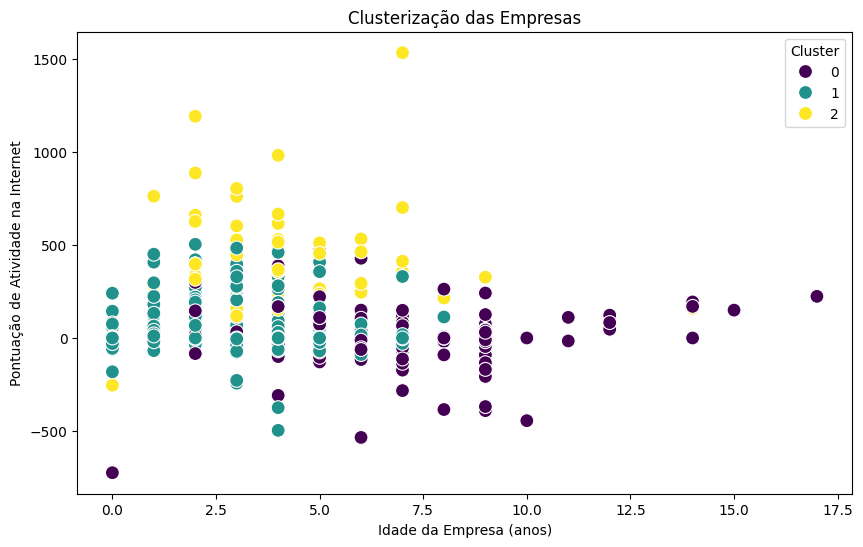

  Company_Name  Cluster
0     Company1        1
1     Company2        0
2     Company3        2
3     Company4        1
4     Company5        1


In [58]:
##################################### VER.1

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o CSV diretamente do link
url = 'https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

# Passo 1: Pré-processamento dos dados

# Substituir valores não numéricos por NaN
df.replace('No Info', np.nan, inplace=True)

# Tratar valores ausentes: substituir por 0 ou pela média/mediana da coluna
df.fillna(0, inplace=True)  # ou df.fillna(df.mean(), inplace=True)

# Selecionar as colunas relevantes para as variáveis independentes (X) e a variável dependente (y)
features = ['Age of company in years', 'Internet Activity Score', 'Percent_skill_Data Science', 'Percent_skill_Business Strategy']
X = df[features]
y = df['Renown score']

# Normalizar as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Passo 2: Random Forest para previsão de "Renown score"

# Criar e treinar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"R2 Score: {r2}")

# Passo 3: Clusterização com K-means

# Aplicar K-means para identificar clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age of company in years'], y=df['Internet Activity Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.title("Clusterização das Empresas")
plt.xlabel('Idade da Empresa (anos)')
plt.ylabel('Pontuação de Atividade na Internet')
plt.legend(title='Cluster')
plt.show()

# Mostrar o DataFrame com os clusters
print(df[['Company_Name', 'Cluster']].head())


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Carregar o CSV diretamente do link
url = 'https://raw.githubusercontent.com/daniel7an/Startup-Success-Analysis/main/data.csv'
df = pd.read_csv(url, encoding='ISO-8859-1')

# Substituir valores não numéricos por NaN
df.replace('No Info', np.nan, inplace=True)

# Garantir que as colunas sejam numéricas
features = ['Age of company in years', 'Internet Activity Score',
            'Percent_skill_Data Science', 'Percent_skill_Business Strategy']

# Converter todas as colunas de features para numérico, forçando 'coerce' para valores não numéricos
df[features] = df[features].apply(pd.to_numeric, errors='coerce')

# Verificar se existem valores ausentes após a conversão
print("Valores ausentes nas colunas selecionadas:")
print(df[features].isna().sum())

# Substituir valores ausentes por 0 (ou você pode usar a média ou mediana, dependendo do seu critério)
df.fillna(0, inplace=True)

# Selecionar variáveis independentes (X) e a variável dependente (y)
X = df[features]
y = df['Renown score']

# Normalizar as variáveis independentes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lista de modelos a serem testados
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Support Vector Machine': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dicionário para armazenar os resultados
results = {}

# Treinar e avaliar cada modelo
for name, model in models.items():
    try:
        # Treinar o modelo
        model.fit(X_train, y_train)

        # Fazer previsões
        y_pred = model.predict(X_test)

        # Avaliar o desempenho do modelo
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Armazenar os resultados
        results[name] = {'MSE': mse, 'R2': r2}
    except Exception as e:
        print(f"Erro ao treinar o modelo {name}: {e}")

# Exibir os resultados
results_df = pd.DataFrame(results).T
print("Resultados de desempenho dos modelos:")
print(results_df)


Valores ausentes nas colunas selecionadas:
Age of company in years            59
Internet Activity Score            65
Percent_skill_Data Science         61
Percent_skill_Business Strategy    61
dtype: int64
Erro ao treinar o modelo K-Nearest Neighbors: unsupported operand type(s) for +: 'int' and 'str'
Resultados de desempenho dos modelos:
                              MSE        R2
Linear Regression        6.683510  0.050249
Decision Tree           11.974436 -0.701610
Support Vector Machine   6.078982  0.136155
Gradient Boosting        6.166107  0.123774
XGBoost                  6.940643  0.013709


# **Conclusion**

In [60]:
print("""



O melhor modelo, com base nos resultados apresentados, foi o **Support Vector Machine (SVM)**.

### Desempenho do modelo SVM:
- **MSE**: 6.08
- **R²**: 0.14

O **SVM** teve o **maior R² (0.14)** entre os modelos testados, o que indica que ele conseguiu explicar uma maior parte da variabilidade dos dados, embora ainda não seja um valor muito alto. No entanto, foi superior aos outros modelos em termos de **explicabilidade** da variabilidade dos dados.

Embora o **MSE** de 6.08 não seja ideal, ele ainda foi mais baixo que os valores obtidos por outros modelos, como a **Árvore de Decisão** (MSE de 11.97) e o **XGBoost** (MSE de 6.94).

### Conclusão:
- **Melhor desempenho**: **Support Vector Machine (SVM)**, com **R² de 0.14**.





""")





O melhor modelo, com base nos resultados apresentados, foi o **Support Vector Machine (SVM)**.

### Desempenho do modelo SVM:
- **MSE**: 6.08
- **R²**: 0.14

O **SVM** teve o **maior R² (0.14)** entre os modelos testados, o que indica que ele conseguiu explicar uma maior parte da variabilidade dos dados, embora ainda não seja um valor muito alto. No entanto, foi superior aos outros modelos em termos de **explicabilidade** da variabilidade dos dados.

Embora o **MSE** de 6.08 não seja ideal, ele ainda foi mais baixo que os valores obtidos por outros modelos, como a **Árvore de Decisão** (MSE de 11.97) e o **XGBoost** (MSE de 6.94).

### Conclusão:
- **Melhor desempenho**: **Support Vector Machine (SVM)**, com **R² de 0.14**.








In [61]:
import pandas as pd
from IPython.display import display, HTML
import json

# Gerar o arquivo JSON com os dados
df_small_teams = df[df['Employee Count'] < 3]
df_small_teams.loc[:, 'Renown score'] = pd.to_numeric(df_small_teams['Renown score'], errors='coerce')
sector_success = df_small_teams.groupby('Industry of company')['Renown score'].mean().sort_values(ascending=False)

# Top 10 setores
labels = sector_success.index[:10].tolist()  # Setores
data = sector_success.head(10).tolist()  # Valores de Renown Score

# Estrutura dos dados JSON que serão injetados no gráfico
chart_data = {
    "labels": labels,
    "data": data
}

# Agora, vamos passar os dados diretamente para o HTML
html_code = f"""
<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <meta name="theme-color" content="#000000" />
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.9.3/Chart.min.css" />
    <title>Dashboard | Performance</title>
  </head>
  <body class="text-blueGray-700 antialiased">
    <noscript>You need to enable JavaScript to run this app.</noscript>
    <div class="relative flex flex-col min-w-0 break-words bg-white w-full mb-6 shadow-lg rounded">
      <div class="rounded-t mb-0 px-4 py-3 bg-transparent">
        <h2 class="text-blueGray-700 text-xl font-semibold">Performance</h2>
      </div>
      <div class="p-4 flex-auto">
        <!-- Chart -->
        <div class="relative h-350-px">
          <canvas id="bar-chart"></canvas>
        </div>
      </div>
    </div>
    <script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.9.3/Chart.min.js" charset="utf-8"></script>
    <script type="text/javascript">
      (function () {{
        var config = {{
          type: "bar",
          data: {{
            labels: {json.dumps(labels)},  // Labels do JSON
            datasets: [
              {{
                label: "Renown Score",
                backgroundColor: "#ed64a6",
                borderColor: "#ed64a6",
                data: {json.dumps(data)},  // Dados do JSON
                fill: false,
                barThickness: 8,
              }}
            ]
          }},
          options: {{
            maintainAspectRatio: false,
            responsive: true,
            scales: {{
              xAxes: [{{
                display: true,
                scaleLabel: {{ display: true, labelString: "Setores" }}
              }}],
              yAxes: [{{
                display: true,
                scaleLabel: {{ display: true, labelString: "Renown Score" }}
              }}]
            }}
          }}
        }};
        var ctx = document.getElementById("bar-chart").getContext("2d");
        new Chart(ctx, config);
      }})();
    </script>
  </body>
</html>
"""

# Exibir o código HTML gerado no Colab
display(HTML(html_code))
